<a href="https://colab.research.google.com/github/klockard12/CaseStudy2DDS/blob/main/multilayer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multilayer Neural Networks

Instructor: Nedelina Teneva <br>



Citations: <br>

 - Chapter 12, 13: Python Machine Learning 3rd Edition by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019
 - https://www.tensorflow.org/tutorials/keras/classification
 - https://towardsdatascience.com/beginners-guide-to-building-neural-networks-in-tensorflow-dab7a09b941d
 - https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations
 - https://www.tensorflow.org/learn
 - https://www.youtube.com/watch?v=aircAruvnKk&t=1011s
 - Cornelia Ilin's prep material: https://github.com/MIDS-W207/cilin-coursework/tree/master/live_sessions

In this part we will focus on multilayer NN and its implementation in TensorFlow. 

TensorFlow (TF) is one of the most popular deep learning libraries currently available. TF can use GPUs (so not only CPUs)

To install TF: pip install tensorflow <br>
To install TF with GPU support (make sure your machine has a compatible NVIDIA graphics card): pip install tensorflow-gpu.

For more information on TF check this website: https://www.tensorflow.org/learn

### Step 1: Import packages

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

print(tf.__version__)

2.9.2


### Step 2: Define working directories

### Step 3: Define classes

### Step 4: Define functions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Step 5: Read data

We will train a multilayer NN model to classify images of clothing using the MNIST fashion dataset.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Shape of train_images', train_images.shape)
print('Shape of test_images', test_images.shape)
print('Labels in train_labels', np.unique(train_labels))
print('Labels in train_labels', np.unique(test_labels))

4422102/4422102 [==============================] - 0s 0us/step
Shape of train_images (60000, 28, 28)
Shape of test_images (10000, 28, 28)
Labels in train_labels [0 1 2 3 4 5 6 7 8 9]
Labels in train_labels [0 1 2 3 4 5 6 7 8 9]


There are 60,000 images in the training set and 10,000 images in the test set, with each image represented as 28 x 28 pixels:

Each image is mapped to a single integer label [0,9]. Class names are not included with the dataset, so we will store them manually here (they will be useful when we plot the images).

### Step 6: Data preprocessing

define class names

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

scale pixel values to a range of 0 to 1

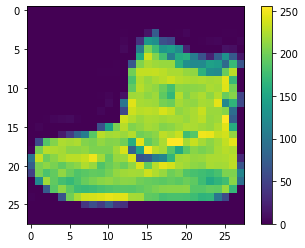

In [ ]:
# this is a image before scaling
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# scale train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

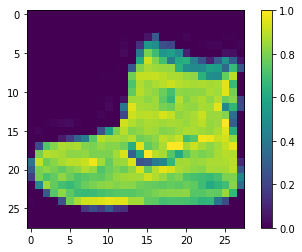

In [ ]:
# this is an image after scaling
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

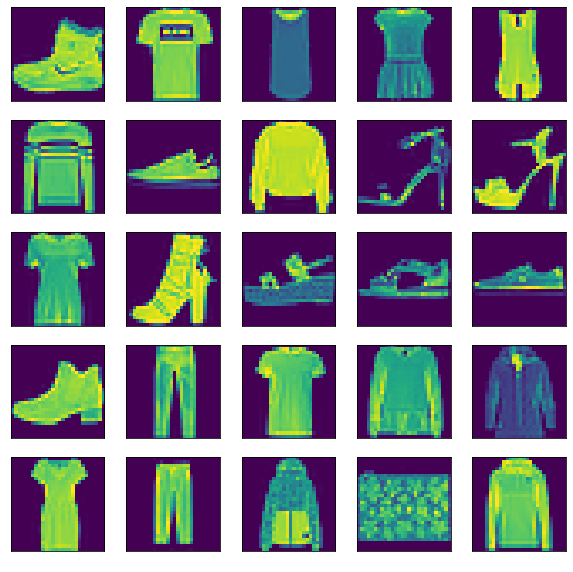

In [ ]:
# let's actally display the first 25 images from the training dataset to make sure everything is corect
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    #plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='white')
plt.show()

### Step 7: Predictions - 2 layer NN

In [ ]:
from google.colab import files
uploaded = files.upload()


MessageError: ignored

In [2]:
Image(filename='multilayerNN.png', width=500)

FileNotFoundError: ignored

The network depicted in the figure above has one input layer, one hidden layer, and one output layer. Each layer receives its inputs from the previous layer.

We can add as many hidden layers as we want to create deeper networks, but these can become very computationally intensive (parameters to be estimated grow exponentially).

The **a()** in the figure stand for activation functions. Note that there are many activation functions to choose from (earlier we covered linear and sigmoid). Keep in mind that for unstructured data, we want to use nonlinear activation functions to account for the complexities of such data.

Here is a link to the activation functions available in tf.keras: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations

In [ ]:
Image(filename='activation_functions.PNG', width=500)

#### Step 7.1: Build the NN model
(requires (a) configuring the layers of the model, and (b) compiling the model

In [ ]:
model = keras.Sequential([
    # the First layer transforms the format of the images (to a 1D array of 28*28 = 784 pixels)
    # this layer has no params to weights to learn, it only reformats data
    # Flattening the array - common for image applications
    # Easier to treat image as a vector 
    # Can think of a layer as a class instead of mathematic equation
    keras.layers.Flatten(input_shape=(28, 28)),
    # the Second layer is a dense layer (i.e., the nodes are fully connected)
    # this layer has 128 nodes, and it uses the activation function Rectified Linear Unit
    keras.layers.Dense(128, activation='relu'),
    # the Third layer is a dropout layer
    # makes it so some of the nodes in a given layer don’t pass on their information to the next layer. This helps with computation time (less parameters) and with overfitting.
    # each node in the second  layer has a 0.2 probability of being dropped from the computation of the activations of the next layer. 
    keras.layers.Dropout(0.2),
    # Also called the sparse layer
    # the Fourth (and last) layer, which is the output layer, returns a logits array of length 10
    # each node contains a probability that indicates the current image belongs to one of the 10 classes
    # note that the size of the output layer is always equal with the number of classes in the dataset
    # it uses the activation function Softmax which is the equivalent of the Sigmoid function for multiclass logits
    keras.layers.Dense(10, activation='softmax')
    # 10 here coincides with the 10 classes
])

In [ ]:
# summarize the model
model.summary()

In [ ]:
# compile the model
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# The loss (cost) function for this particular model is ‘sparse_categorical_crossentropy’ which is good for multiclass-classification problems like this one.
# Check here for more optimizer options: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

#### Step 7.2: Fit the NN model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10) #epochs = iteerations over the data
#for each of the epochs, going to print accuracy as created in model.compile()

In [ ]:
# plot training cost and accuracy
hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss (cost)', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

# training loss: take output of third layer and measure the loss with respect to original label
# if we defined the loss as a function of accuracy, that would not be differentiable


#### Step 7.3: Evaluate accuracy on the test set

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

#### Step 7.4: Make predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
# let's look at the predictions for the first image
print(predictions[0])

print("\nThe model thinks that the first image is", np.argmax(predictions[0]), ':', class_names[np.argmax(predictions[0])])

Let's now plot several images with their predictions. Note that the model can be wrong even when very confident. 

Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Now try to change the number of hidden layers, the number of iterations(epochs), the number of nodes in the hidden layers. What's the impact?

What happens if you remove the dropout (regularization in multilayer NN)?